In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('2019.csv')

# Loop through each numerical column (except Overall Rank)
for col in df.select_dtypes(include=[np.number]).columns.drop('Overall rank'):
    
    # Calculate mean, median, and mode
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().values[0]
    print(f"Column: {col}")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Mode: {mode:.2f}")
    
    # Calculate range, Q1, Q3, and IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    r = df[col].max() - df[col].min()
    print(f"Range: {r:.2f}")
    print(f"Q1: {q1:.2f}")
    print(f"Q3: {q3:.2f}")
    print(f"IQR: {iqr:.2f}")
    
    # Calculate standard deviation and variance
    std = df[col].std()
    var = df[col].var()
    print(f"Standard deviation: {std:.2f}")
    print(f"Variance: {var:.2f}")
    
    # Calculate z-score for each data point
    z_scores = (df[col] - mean) / std
    print("Z-scores:")
    print(z_scores.head())
    print("\n")


Column: Score
Mean: 5.41
Median: 5.38
Mode: 5.21
Range: 4.92
Q1: 4.54
Q3: 6.18
IQR: 1.64
Standard deviation: 1.11
Variance: 1.24
Z-scores:
0    2.121877
1    1.970052
2    1.928727
3    1.874824
4    1.869434
Name: Score, dtype: float64


Column: GDP per capita
Mean: 0.91
Median: 0.96
Mode: 0.96
Range: 1.68
Q1: 0.60
Q3: 1.23
IQR: 0.63
Standard deviation: 0.40
Variance: 0.16
Z-scores:
0    1.091526
1    1.199461
2    1.463022
3    1.191931
4    1.232092
Name: GDP per capita, dtype: float64


Column: Social support
Mean: 1.21
Median: 1.27
Mode: 1.47
Range: 1.62
Q1: 1.06
Q3: 1.45
IQR: 0.40
Standard deviation: 0.30
Variance: 0.09
Z-scores:
0    1.264027
1    1.217234
2    1.247315
3    1.387693
4    1.046774
Name: Social support, dtype: float64


Column: Healthy life expectancy
Mean: 0.73
Median: 0.79
Mode: 0.81
Range: 1.14
Q1: 0.55
Q3: 0.88
IQR: 0.33
Standard deviation: 0.24
Variance: 0.06
Z-scores:
0    1.076954
1    1.118255
2    1.250419
3    1.242159
4    1.130646
Name: Healthy life e

In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('2019.csv')

# Loop through each numerical column (except Overall Rank)
for col in df.select_dtypes(include=[np.number]).columns.drop('Overall rank'):
    
    # Calculate IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    # Find outliers using IQR method
    iqr_lower = q1 - 1.5*iqr
    iqr_upper = q3 + 1.5*iqr
    iqr_outliers = df[(df[col] < iqr_lower) | (df[col] > iqr_upper)][col]
    
    # Calculate mean and standard deviation
    mean = df[col].mean()
    std = df[col].std()
    
    # Find outliers using Z-score method
    z_score_threshold = 3
    z_score_outliers = df[(df[col] - mean).abs() > z_score_threshold * std][col]
    
    # Print results
    print(f"Column: {col}")
    print(f"IQR Outliers: {list(iqr_outliers)}")
    print(f"Z-score Outliers: {list(z_score_outliers)}")
    print("\n")


Column: Score
IQR Outliers: []
Z-score Outliers: []


Column: GDP per capita
IQR Outliers: []
Z-score Outliers: []


Column: Social support
IQR Outliers: [0.437, 0.447, 0.378, 0.0]
Z-score Outliers: [0.0]


Column: Healthy life expectancy
IQR Outliers: [0.0]
Z-score Outliers: []


Column: Freedom to make life choices
IQR Outliers: [0.0]
Z-score Outliers: []


Column: Generosity
IQR Outliers: [0.498, 0.566]
Z-score Outliers: [0.498, 0.566]


Column: Perceptions of corruption
IQR Outliers: [0.393, 0.41, 0.341, 0.298, 0.343, 0.373, 0.38, 0.308, 0.29, 0.316, 0.31, 0.453, 0.287, 0.411]
Z-score Outliers: [0.41, 0.453, 0.411]




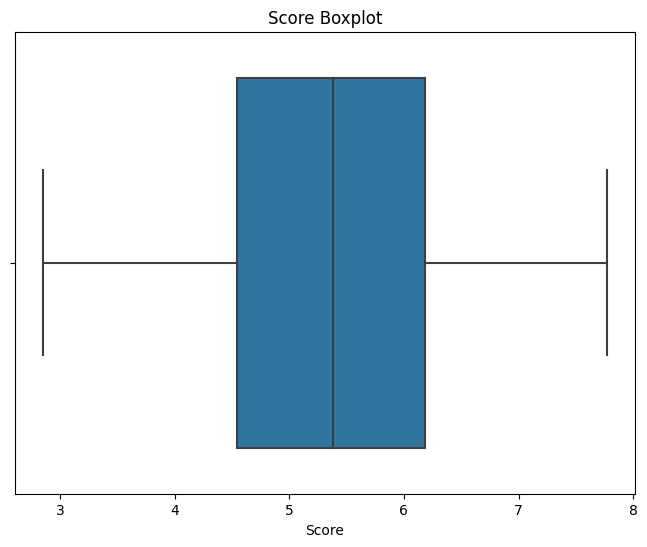

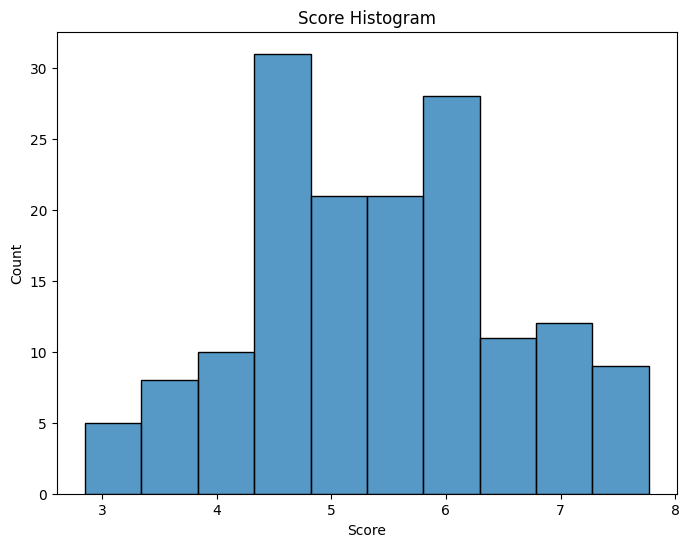

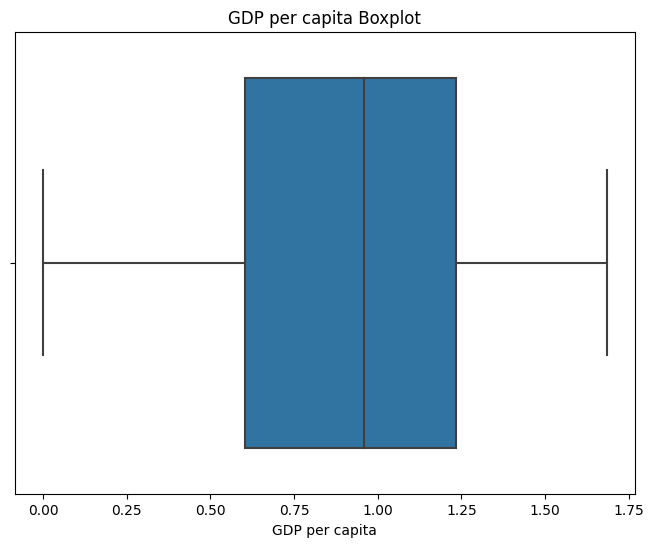

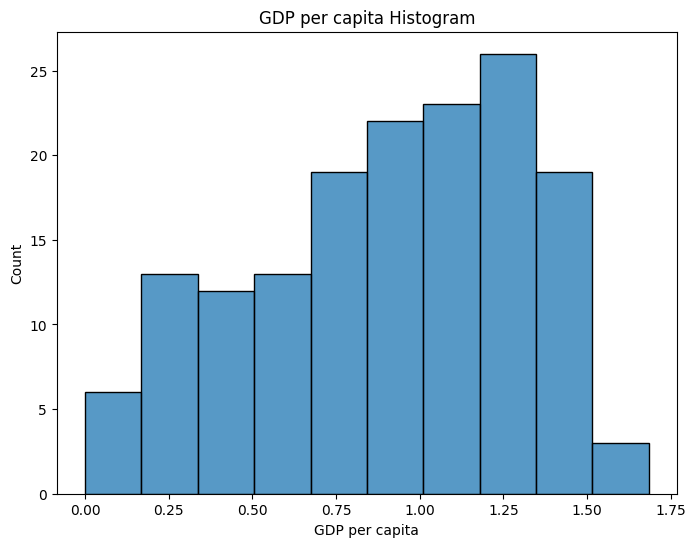

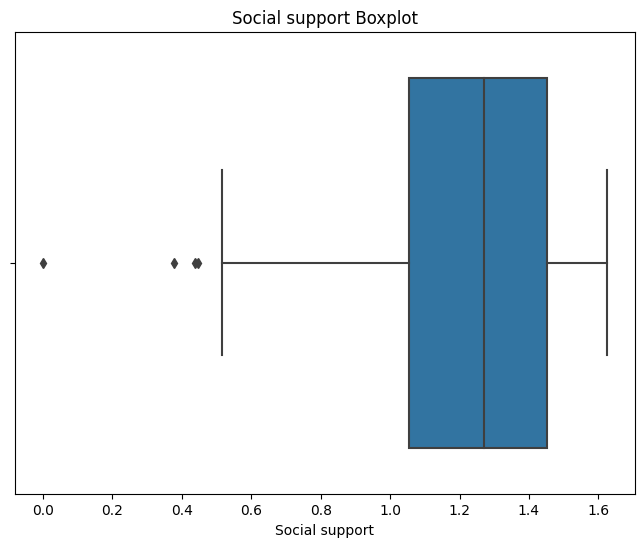

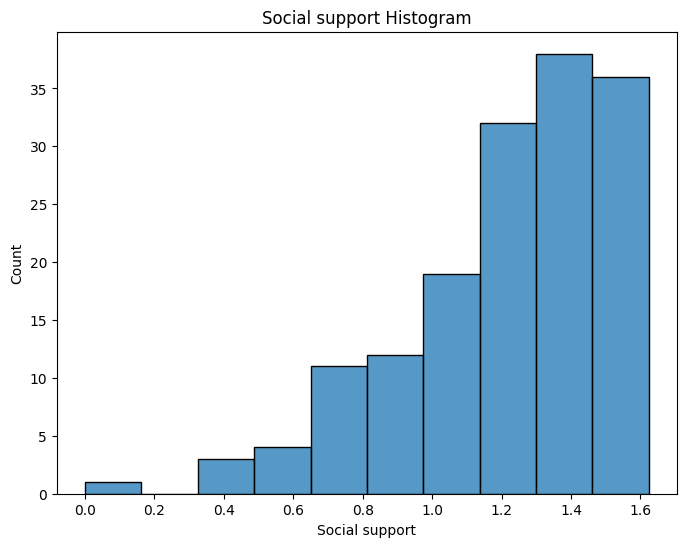

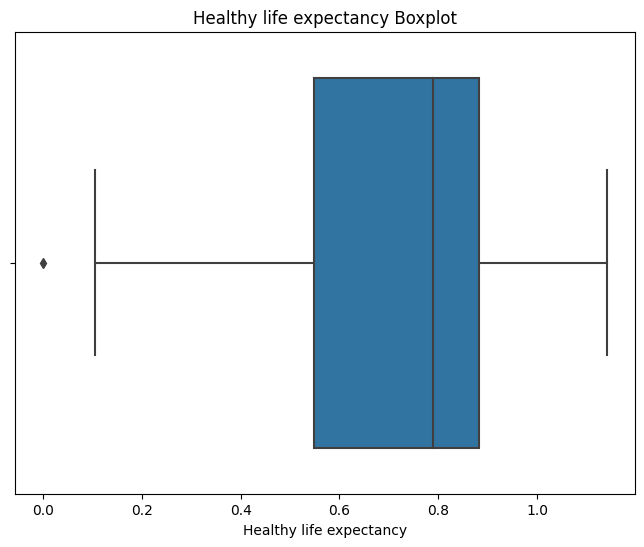

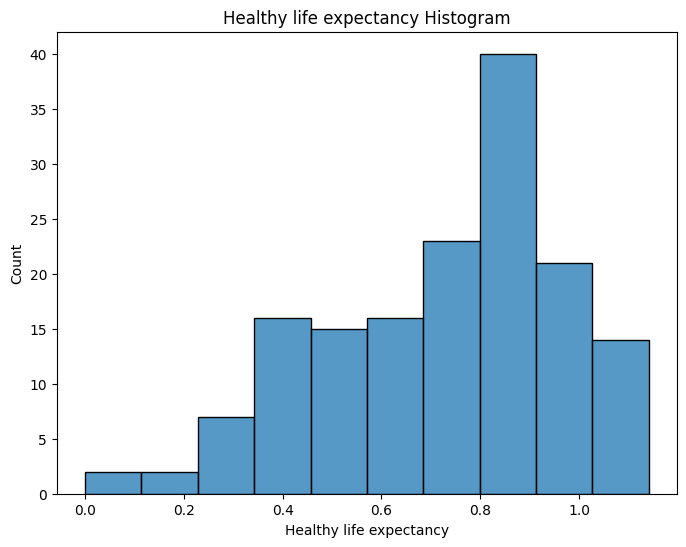

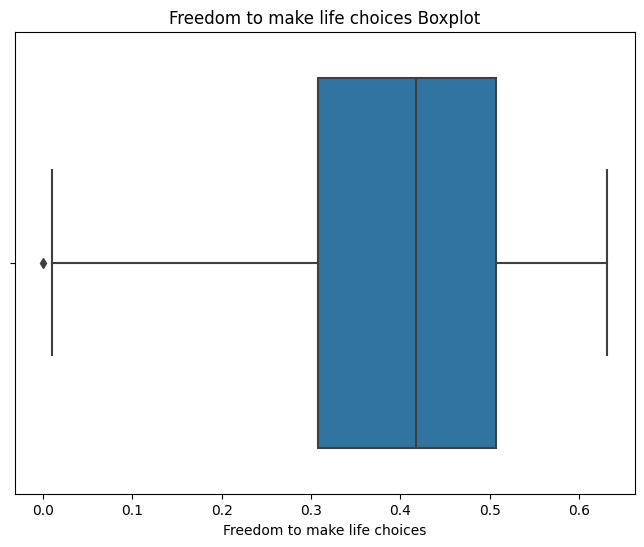

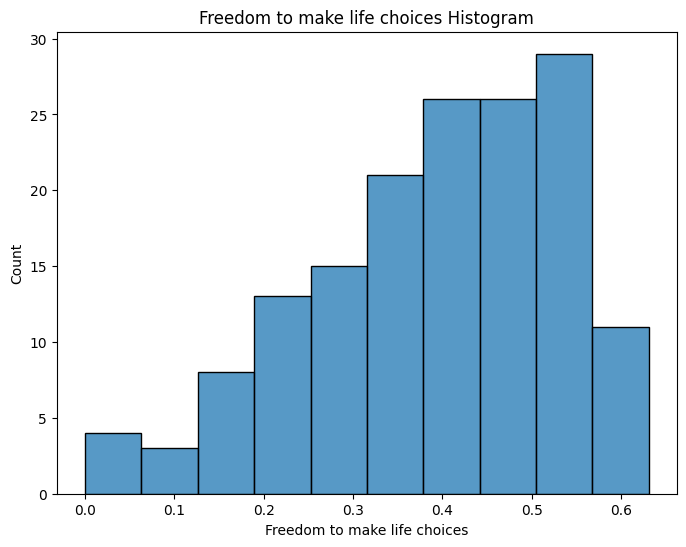

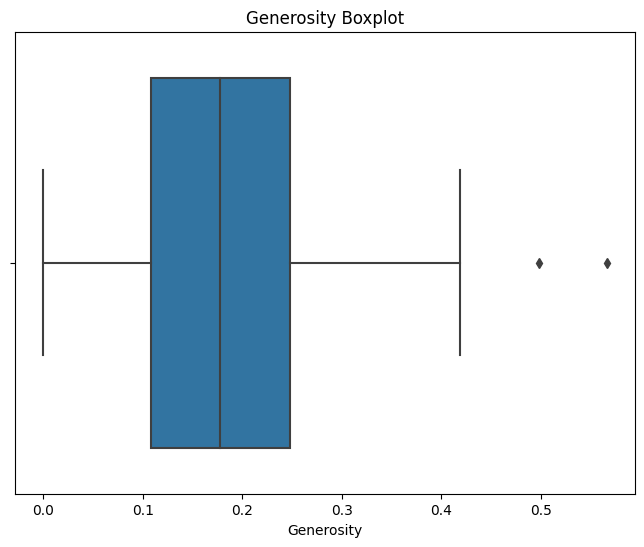

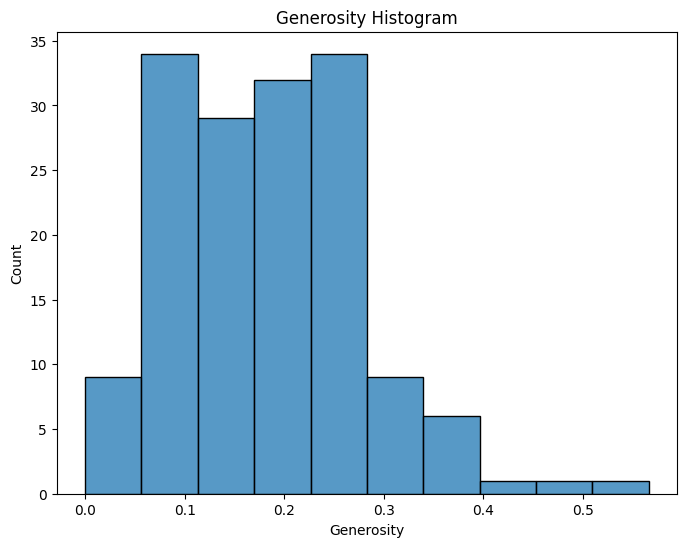

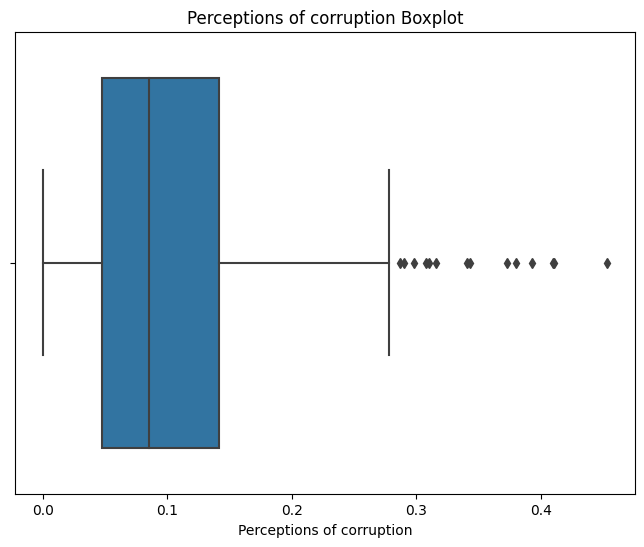

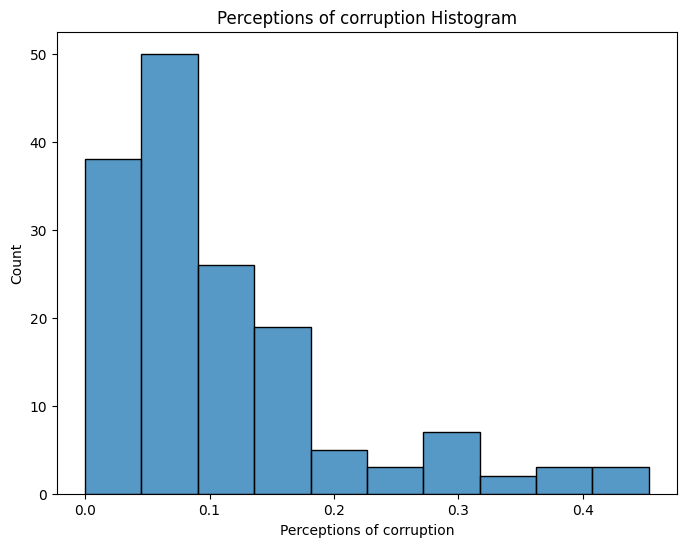

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('2019.csv')

# Loop through each numerical column (except Overall Rank)
for col in df.select_dtypes(include=[np.number]).columns.drop('Overall rank'):

    # Plot boxplot
    plt.figure(figsize=(8,6))
    sns.boxplot(x=col, data=df)
    plt.title(f"{col} Boxplot")
    plt.show()

    # Plot histogram
    plt.figure(figsize=(8,6))
    sns.histplot(x=col, data=df, bins=10)
    plt.title(f"{col} Histogram")
    plt.show()


In [10]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau

# Load dataset
df = pd.read_csv('2019.csv')

# Loop through each numerical column (except Overall Rank)
for col in df.select_dtypes(include=[np.number]).columns.drop('Overall rank'):

    # Calculate covariance
    cov = np.cov(df[col], df['Score'])[0][1]
    
    # Calculate Pearson correlation
    pearson_corr, pearson_pvalue = pearsonr(df[col], df['Score'])
    
    # Calculate Spearman correlation
    spearman_corr, spearman_pvalue = spearmanr(df[col], df['Score'])
    
    # Calculate Kendall correlation
    kendall_corr, kendall_pvalue = kendalltau(df[col], df['Score'])
    
    # Print results
    print(f"Column: {col}")
    print(f"Covariance: {cov}")
    print(f"Pearson Correlation: {pearson_corr} (p-value: {pearson_pvalue})")
    print(f"Spearman Correlation: {spearman_corr} (p-value: {spearman_pvalue})")
    print(f"Kendall Correlation: {kendall_corr} (p-value: {kendall_pvalue})")
    print("\n")


Column: Score
Covariance: 1.2390358423076928
Pearson Correlation: 0.9999999999999997 (p-value: 0.0)
Spearman Correlation: 1.0 (p-value: 0.0)
Kendall Correlation: 1.0 (p-value: 1.286098545149626e-76)


Column: GDP per capita
Covariance: 0.352051508312655
Pearson Correlation: 0.7938828678781273 (p-value: 4.315480913319774e-35)
Spearman Correlation: 0.8144834033942763 (p-value: 3.052425844116973e-38)
Kendall Correlation: 0.6199934327488547 (p-value: 1.642184505577228e-30)


Column: Social support
Covariance: 0.2587881341191066
Pearson Correlation: 0.777057788063864 (p-value: 8.975119655183757e-33)
Spearman Correlation: 0.8161807357057258 (p-value: 1.613098226311642e-38)
Kendall Correlation: 0.6167915564234095 (p-value: 3.27199646906353e-30)


Column: Healthy life expectancy
Covariance: 0.21018867320099258
Pearson Correlation: 0.7798831492425831 (p-value: 3.7854540648401376e-33)
Spearman Correlation: 0.8072745738421483 (p-value: 4.267176823442759e-37)
Kendall Correlation: 0.602612853170004

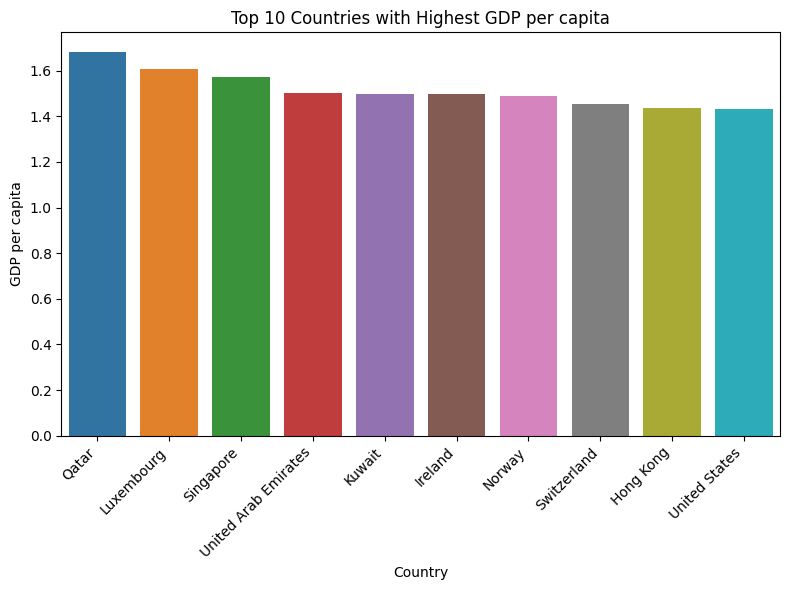

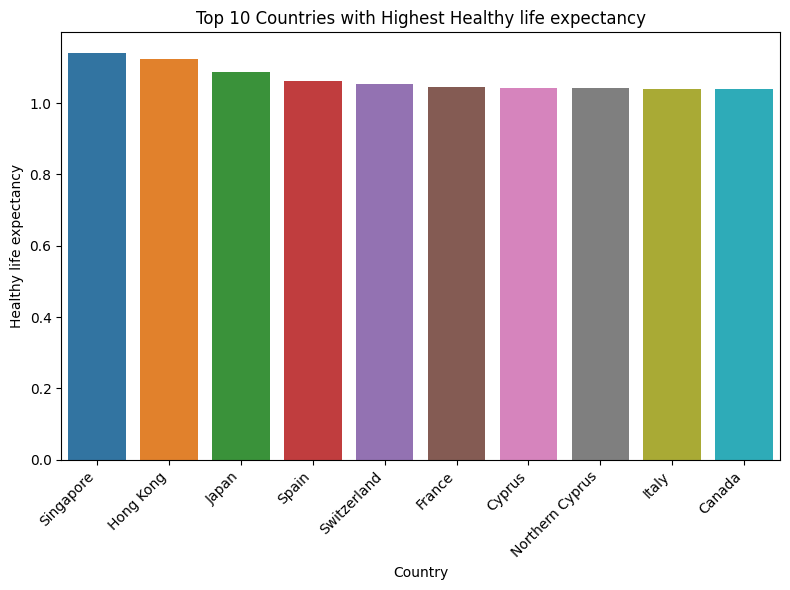

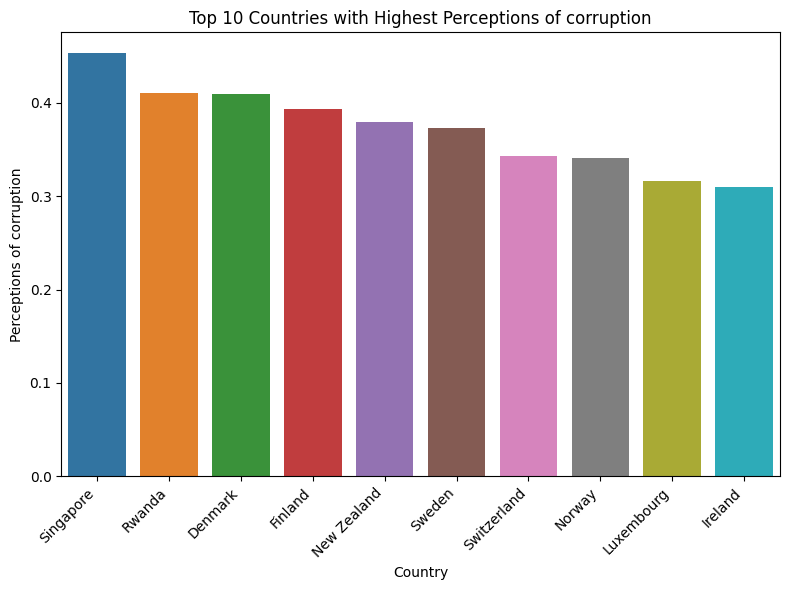

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('2019.csv')

# Get top 10 countries with highest GDP per capita
top_gdp = df.sort_values('GDP per capita', ascending=False).head(10)

# Create bar chart for GDP per capita
plt.figure(figsize=(8,6))
sns.barplot(x='Country or region', y='GDP per capita', data=top_gdp)
plt.title('Top 10 Countries with Highest GDP per capita')
plt.xlabel('Country')
plt.ylabel('GDP per capita')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Get top 10 countries with highest Healthy life expectancy
top_life = df.sort_values('Healthy life expectancy', ascending=False).head(10)

# Create bar chart for Healthy life expectancy
plt.figure(figsize=(8,6))
sns.barplot(x='Country or region', y='Healthy life expectancy', data=top_life)
plt.title('Top 10 Countries with Highest Healthy life expectancy')
plt.xlabel('Country')
plt.ylabel('Healthy life expectancy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Get top 10 countries with highest perceptions of corruption
top_corruption = df.sort_values('Perceptions of corruption', ascending=False).head(10)

# Create bar chart for perceptions of corruption
plt.figure(figsize=(8,6))
sns.barplot(x='Country or region', y='Perceptions of corruption', data=top_corruption)
plt.title('Top 10 Countries with Highest Perceptions of corruption')
plt.xlabel('Country')
plt.ylabel('Perceptions of corruption')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
